#### In the model below we do SHAP analysis to understand the impact of the individual features on credit growth and credit quality

In [112]:
import shap
import pandas as pd
import numpy as np
shap.initjs()


In [113]:
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('data/Master_data.csv')

In [115]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,...,cc_bals_30d_due_percentage_yoy_12m,cc_bals_30d_due_percentage_12m,Qtr,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total
0,0,0,0,2003-01-01,2003,January,289412000.0,5.8,NaN,2.597403,...,0.0,NaN,03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313
1,1,1,1,2003-02-01,2003,February,289606000.0,5.9,NaN,2.980877,...,0.0,NaN,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
2,2,2,2,2003-03-01,2003,March,289809000.0,5.9,NaN,3.020134,...,0.0,NaN,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
3,3,3,3,2003-04-01,2003,April,290024000.0,6.0,NaN,2.224694,...,0.0,NaN,03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
4,4,4,4,2003-05-01,2003,May,290250000.0,6.1,NaN,2.057842,...,0.0,NaN,03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551


In [116]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [117]:
features = ['cpi_yoy', 'shelter_yoy', 'energy_yoy',
       'medical_care_yoy', 'food_yoy', 'gasoline_yoy', 'new_&_used_vehicles_yoy', 'total_personal_savings', 'total_employee_compensation',
           'population', 'wages_and_salaries_all', 'social_security', 'personal_interest_income', 'mortgage_rate_30_yr',
       'tax_other_to_government', 'Mortgage_servicing_yoy', 'cc_payments_yoy']
X = df[108:235][features]
y = df[108:235]['cc_bals_30d_due_percentage_12m']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [118]:

explainer = shap.Explainer(model.predict, X_test)

shap_values = explainer(X_test)

In [119]:
# Evaluate SHAP values
shap_values = explainer.shap_values(X)

In [120]:
shap_values

array([[ 0.01924498,  0.00947297,  0.01734904, ...,  0.02293921,
        -0.00772885,  0.04742147],
       [ 0.01838205,  0.0112203 ,  0.01946731, ...,  0.02243451,
        -0.00559637,  0.04273397],
       [ 0.01755577,  0.00229071, -0.00325246, ...,  0.02419669,
        -0.00670983,  0.03896741],
       ...,
       [ 0.01528408,  0.0008812 ,  0.03517415, ...,  0.00452692,
         0.027825  ,  0.22088088],
       [ 0.01689466,  0.00525684,  0.0346391 , ...,  0.00566891,
         0.02982521,  0.2658344 ],
       [ 0.01867885,  0.00812553,  0.03527511, ...,  0.00741111,
         0.03350588,  0.27483291]])

In [122]:
#datacamp
y_pred = model.predict(X_test)

explainer = shap.Explainer(model)

In [123]:
shap_values = explainer.shap_values(X_test)

In [124]:
shap_values[0]

array([ 0.01507403,  0.00686643,  0.01703399, -0.01104177, -0.01280551,
        0.03800823,  0.04299593,  0.0865551 , -0.00358927, -0.01338346,
       -0.0007885 , -0.0124236 ,  0.00767918, -0.00394254,  0.0073543 ,
        0.00690786,  0.00682269])

In [129]:
#https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
#rf_shap_values = shap.KernelExplainer(model.predict, X_test)

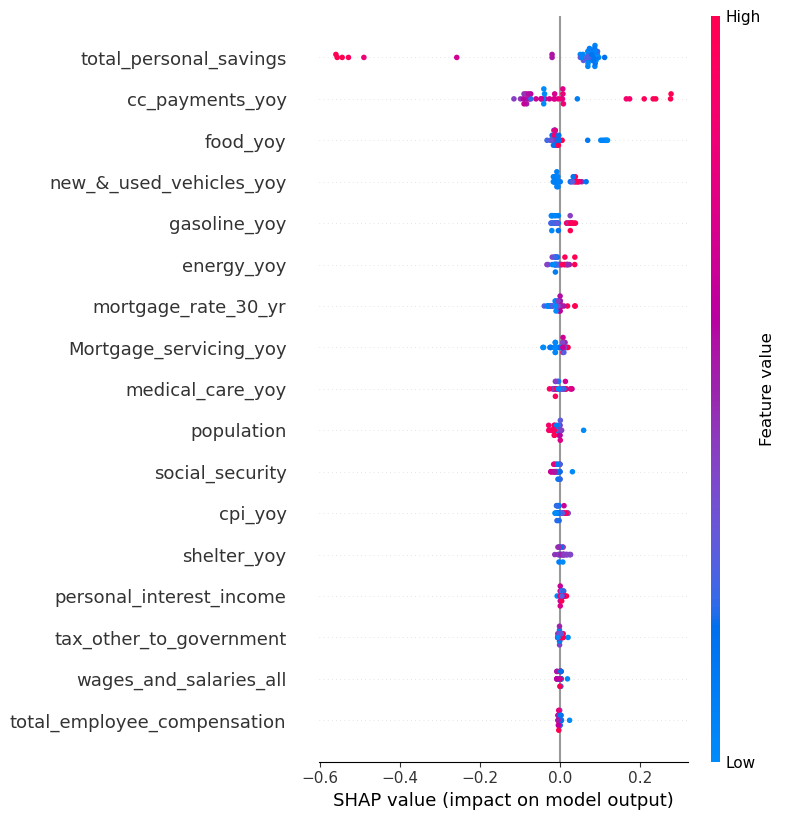

In [130]:
shap.summary_plot(shap_values, X_test)

<Figure size 640x480 with 0 Axes>

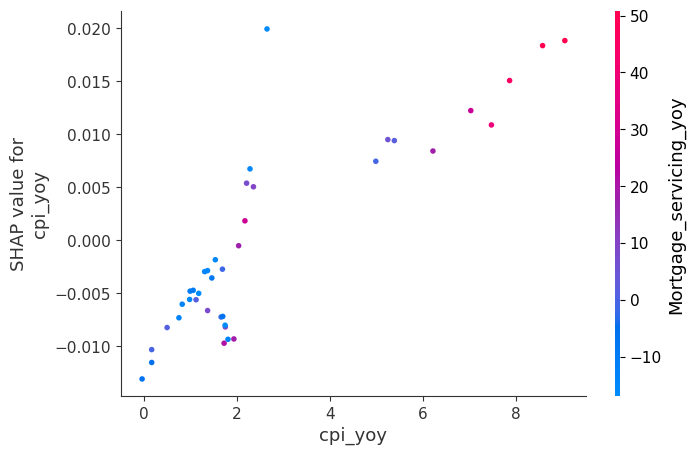

In [131]:
f = plt.figure()
shap.dependence_plot("cpi_yoy", shap_values, X_test) 
f.savefig("images/cpi_shap.png", bbox_inches='tight', dpi=600)

<Figure size 640x480 with 0 Axes>

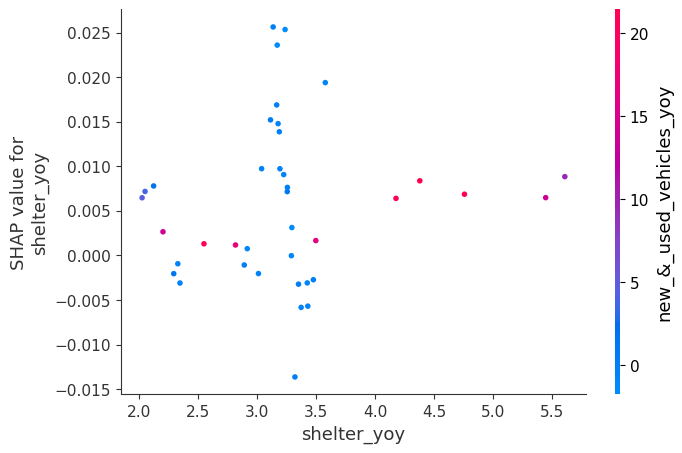

In [132]:
f = plt.figure()
shap.dependence_plot("shelter_yoy", shap_values, X_test) 
f.savefig("images/shelter_shap.png", bbox_inches='tight', dpi=600)

<Figure size 640x480 with 0 Axes>

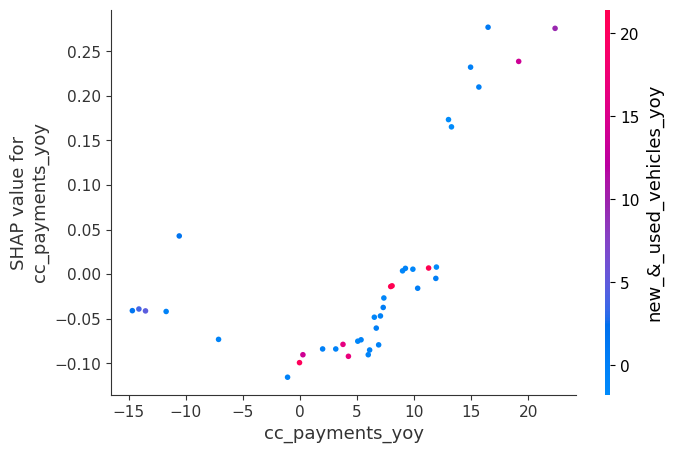

In [133]:
f = plt.figure()
shap.dependence_plot("cc_payments_yoy", shap_values, X_test) 
f.savefig("images/cc_payments_shap.png", bbox_inches='tight', dpi=600)

<Figure size 640x480 with 0 Axes>

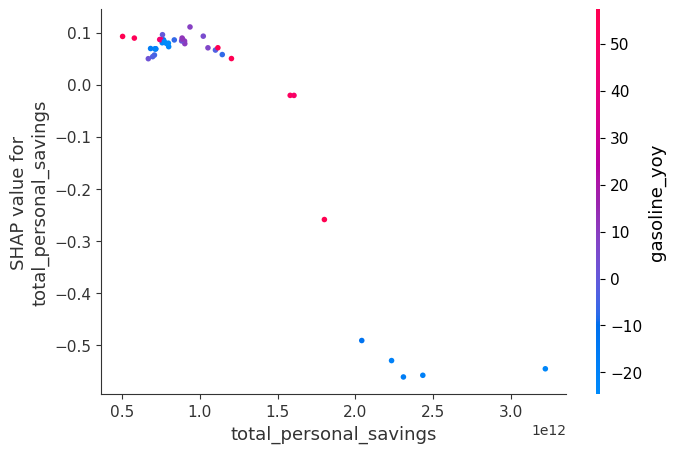

In [134]:
f = plt.figure()
shap.dependence_plot("total_personal_savings", shap_values, X_test) 
f.savefig("images/savings_shap.png", bbox_inches='tight', dpi=600)

In [135]:
X_test.mean()

cpi_yoy                        2.678227e+00
shelter_yoy                    3.235128e+00
energy_yoy                     3.555243e+00
medical_care_yoy               2.894213e+00
food_yoy                       2.767693e+00
gasoline_yoy                   5.903837e+00
new_&_used_vehicles_yoy        4.084530e+00
total_personal_savings         1.102017e+12
total_employee_compensation    1.096983e+13
population                     3.274337e+08
wages_and_salaries_all         8.949272e+12
social_security                9.865866e+11
personal_interest_income       1.455468e+12
mortgage_rate_30_yr            3.727628e+00
tax_other_to_government        1.080469e+11
Mortgage_servicing_yoy         5.817022e+00
cc_payments_yoy                5.351923e+00
dtype: float64

In [136]:
X_test.head(11)

,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,gasoline_yoy,new_&_used_vehicles_yoy,total_personal_savings,total_employee_compensation,population,wages_and_salaries_all,social_security,personal_interest_income,mortgage_rate_30_yr,tax_other_to_government,Mortgage_servicing_yoy,cc_payments_yoy
229,7.871064,4.757652,25.550810,2.440749,7.897539,43.910256,23.533280,7.490670e+11,1.318627e+13,332972000.0,1.089432e+13,1.197699e+12,1.550787e+12,3.7625,1.259220e+11,46.014444,11.254668
154,0.501798,3.179172,-14.684643,2.916879,1.270025,-24.315899,-0.398746,7.705190e+11,9.811191e+12,323113000.0,7.953493e+12,8.802400e+11,1.371212e+12,3.9425,9.987700e+10,1.014004,6.090358
181,2.211795,3.137403,7.731779,1.788269,1.396755,12.005220,0.079426,8.851530e+11,1.077990e+13,328085000.0,8.759145e+12,9.580690e+11,1.508964e+12,4.3300,1.091170e+11,7.581300,14.930895
198,1.811465,3.478007,-2.032082,2.535621,1.784462,-3.376262,0.257246,1.099553e+12,1.140521e+13,330553000.0,9.284143e+12,1.031625e+12,1.604503e+12,3.7650,1.149990e+11,-14.139328,10.296540
211,1.309645,2.295514,-9.040548,4.400747,4.128710,-18.003766,1.593746,2.433284e+12,1.157726e+13,331885000.0,9.444660e+12,1.081309e+12,1.492704e+12,2.9350,1.086980e+11,-14.705395,-14.692985
161,0.997326,3.426356,-9.429460,3.531020,0.325118,-16.560734,-0.778836,6.823270e+11,9.929757e+12,324476000.0,8.060227e+12,8.929470e+11,1.379291e+12,3.5680,1.015860e+11,-9.431852,6.501456
228,7.479872,4.379360,26.978706,2.507268,6.951406,46.732588,23.429045,7.410430e+11,1.311271e+13,332933000.0,1.082946e+13,1.195473e+12,1.538960e+12,3.4450,1.254020e+11,38.605349,7.934374
210,0.986082,2.348132,-11.158603,4.988041,4.099909,-21.613833,-0.254566,3.221314e+12,1.145594e+13,331811000.0,9.338495e+12,1.078039e+12,1.494489e+12,3.0160,1.080460e+11,-16.294622,-11.733778
225,6.221869,3.498717,29.970783,1.300314,5.328209,56.785549,16.326373,1.202395e+12,1.292299e+13,332708000.0,1.066153e+13,1.129100e+12,1.518041e+12,3.0675,1.235380e+11,17.798951,3.755497
150,0.169570,3.114906,-14.755319,2.544142,1.633105,-22.047894,0.504349,7.572900e+11,9.729551e+12,322186000.0,7.883998e+12,8.722680e+11,1.357284e+12,4.0460,9.915400e+10,-0.479646,7.279391


In [137]:
df.iloc[229]

Unnamed: 0.2           229
Unnamed: 0.1           229
Unnamed: 0             229
date            2022-02-01
year                  2022
                   ...    
Auto Loan            1.502
Credit Card          0.887
Student Loan         1.589
Other                 0.47
Total               16.154
Name: 229, Length: 93, dtype: object

In [138]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'date', 'year', 'month',
       'population', 'unemployment_rate', 'hourly_earnings_yoy', 'cpi_yoy',
       'shelter_yoy', 'energy_yoy', 'medical_care_yoy', 'food_yoy',
       'gasoline_yoy', 'imports_yoy', 'new_&_used_vehicles_yoy',
       'all_less_food_&_shelter_yoy', 'total_personal_income',
       'total_employee_compensation', 'wages_and_salaries_all',
       'wages_salaries_private_employees',
       'wages_salaries_government_employees',
       'employer_contributions_for_employee_pension_and_insurance_funds',
       'employer_contributions_for_government_social_insurance',
       'rental_income_(capital_consumption_adjusted)',
       'personal_dividend_income', 'personal_interest_income',
       'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid',
       'unemployment_insurance', 'veterans'_benefits',
       'total_disposible_personal_income_chained_2017',
       'total_personal_savings',
       'personal_

In [143]:
df.loc[229, 'cc_bals_30d_due_percentage_12m']

2.7466666666666666

In [140]:
X_test.iloc[0]

cpi_yoy                        7.871064e+00
shelter_yoy                    4.757652e+00
energy_yoy                     2.555081e+01
medical_care_yoy               2.440749e+00
food_yoy                       7.897539e+00
gasoline_yoy                   4.391026e+01
new_&_used_vehicles_yoy        2.353328e+01
total_personal_savings         7.490670e+11
total_employee_compensation    1.318627e+13
population                     3.329720e+08
wages_and_salaries_all         1.089432e+13
social_security                1.197699e+12
personal_interest_income       1.550787e+12
mortgage_rate_30_yr            3.762500e+00
tax_other_to_government        1.259220e+11
Mortgage_servicing_yoy         4.601444e+01
cc_payments_yoy                1.125467e+01
Name: 229, dtype: float64

In [141]:
shap.initjs()

In [142]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])